In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to add a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.1467 - accuracy: 0.9542 - val_loss: 0.0487 - val_accuracy: 0.9848
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.0442 - val_accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0375 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0253 - accuracy: 0.9922 - val_loss: 0.0421 - val_accuracy: 0.9881
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0362 - val_accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0159 - accuracy: 0.9944 - val_loss: 0.0342 - val_accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0330 -

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test loss: {test_loss}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0355 - accuracy: 0.9911
Test loss: 0.03550557792186737


In [7]:
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.991100013256073


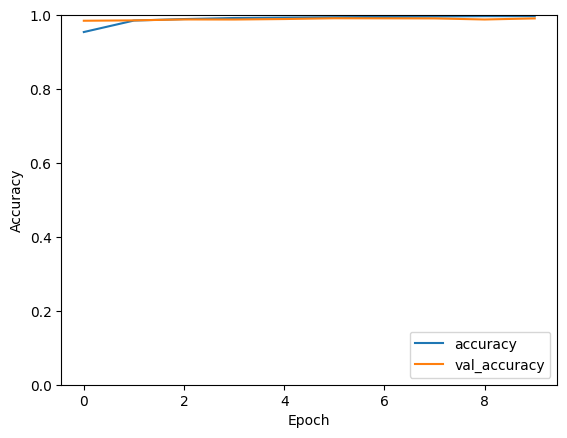

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load a new image (assuming the image is named 'new_digit.png' and located in the current directory)
new_image = image.load_img('seven.png', target_size=(28, 28), color_mode='grayscale')


In [16]:
# Convert the image to an array
new_image_array = image.img_to_array(new_image)

In [17]:
# Normalize the image
new_image_array = new_image_array / 255.0

In [18]:
# Reshape the image to match the input shape of the model
new_image_array = new_image_array.reshape(1, 28, 28, 1)

1/1 [==============================] - 0s 25ms/step
Predicted digit: 7


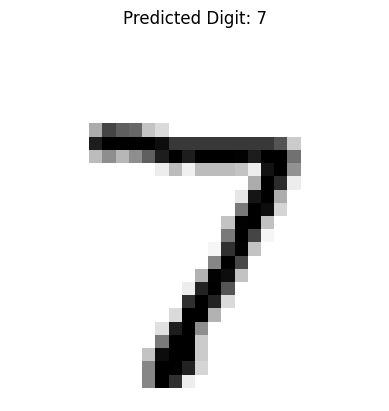

In [19]:
# Predict the digit
predictions = model.predict(new_image_array)
predicted_digit = np.argmax(predictions)
print(f"Predicted digit: {predicted_digit}")
# Plot the new image
plt.imshow(new_image_array.reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')  # Hide the axes for better visualization
plt.show()